In [1]:
li = [100, 200, 150, 300,180]

In [2]:
li

[100, 200, 150, 300, 180]

In [3]:
import pandas as pd
df = pd.DataFrame(li, columns=['cost'])
df

,cost
0,100
1,200
2,150
3,300
4,180


# Techniques to perform Feature Transformation:

Normalization <br>
Standardization <br>
Log Transformation <br>
Robust Scaler <br>
Max Absolute Scaler


# Normalization / min max scaler

- ### Using raw calculation

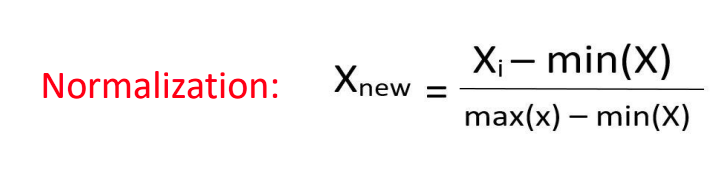

In [4]:
min_cost = df.cost.min()
max_cost = df.cost.max()

In [5]:
min_cost

100

In [6]:
max_cost

300

In [7]:
df['cost_norm_manual'] = (df.cost - min_cost ) / (max_cost - min_cost)

In [8]:
df.head()

,cost,cost_norm_manual
0,100,0.00
1,200,0.50
2,150,0.25
3,300,1.00
4,180,0.40


- ### using sklearn

In [9]:
from sklearn.preprocessing import MinMaxScaler
mmx = MinMaxScaler() #feature_range=(2,5)

In [10]:
df['cost_norm_sklearn'] = mmx.fit_transform(df[['cost']])

In [11]:
df.head()

,cost,cost_norm_manual,cost_norm_sklearn
0,100,0.00,0.00
1,200,0.50,0.50
2,150,0.25,0.25
3,300,1.00,1.00
4,180,0.40,0.40


# Standardization / standard scaler

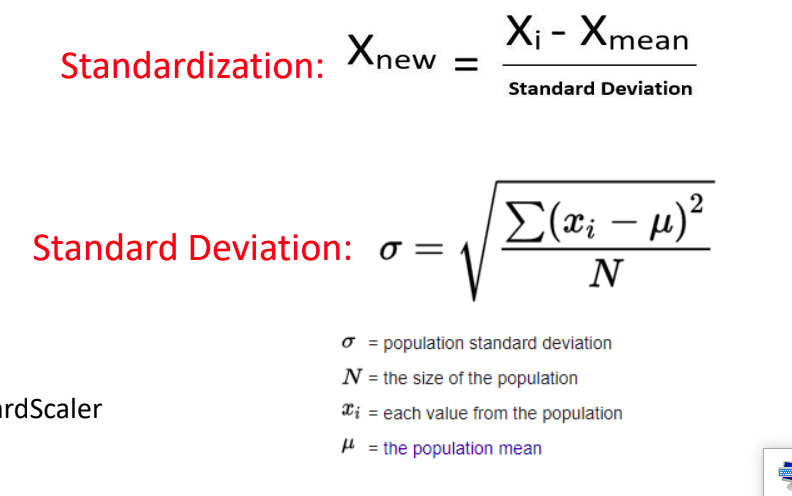

In [12]:
mean_cost = df.cost.mean()
std = df.cost.std()

In [13]:
df['cost_std_manual'] = (df['cost'] - mean_cost) / std

In [14]:
df.head()

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual
0,100,0.00,0.00,-1.161738
1,200,0.50,0.50,0.189120
2,150,0.25,0.25,-0.486309
3,300,1.00,1.00,1.539978
4,180,0.40,0.40,-0.081051


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
df['cost_std_sklearn'] = scaler.fit_transform(df[['cost']])

In [17]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn
0,100,0.00,0.00,-1.161738,-1.298863
1,200,0.50,0.50,0.189120,0.211443
2,150,0.25,0.25,-0.486309,-0.543710
3,300,1.00,1.00,1.539978,1.721748
4,180,0.40,0.40,-0.081051,-0.090618


In [18]:
std_dof = df.cost.std(ddof=0)

In [19]:
std_dof

66.2117814289874

In [20]:
std_dof1 = df.cost.std(ddof=1)
std_dof1

74.02702209328699

In [21]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn
0,100,0.00,0.00,-1.161738,-1.298863
1,200,0.50,0.50,0.189120,0.211443
2,150,0.25,0.25,-0.486309,-0.543710
3,300,1.00,1.00,1.539978,1.721748
4,180,0.40,0.40,-0.081051,-0.090618


In [22]:
df['cost_std_manual2'] = (df['cost'] - mean_cost) / std_dof1

In [23]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2
0,100,0.00,0.00,-1.161738,-1.298863,-1.161738
1,200,0.50,0.50,0.189120,0.211443,0.189120
2,150,0.25,0.25,-0.486309,-0.543710,-0.486309
3,300,1.00,1.00,1.539978,1.721748,1.539978
4,180,0.40,0.40,-0.081051,-0.090618,-0.081051


In [24]:
df['cost_std_manual2'] = (df['cost'] - mean_cost) / std_dof

In [25]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863
1,200,0.50,0.50,0.189120,0.211443,0.211443
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710
3,300,1.00,1.00,1.539978,1.721748,1.721748
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618


# Log Transformation

In [26]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [27]:
fc = FunctionTransformer(np.log1p)
df['cost_fc'] = fc.fit_transform(df[['cost']])
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497


In [28]:
df['fc_np'] = np.log1p(df[['cost']])

In [29]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497


# Robust Scaler

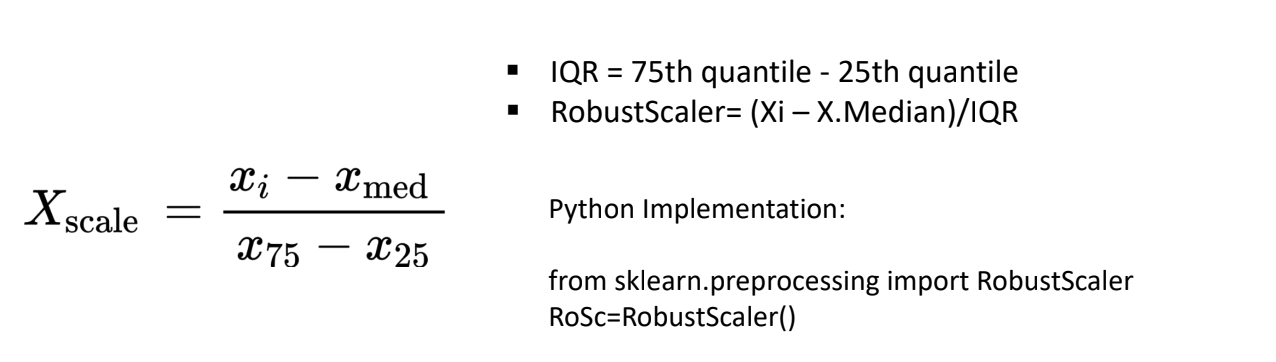

In [30]:
from sklearn.preprocessing import MaxAbsScaler

In [31]:
mx = MaxAbsScaler()

In [32]:
df['mx_abs'] = mx.fit_transform(df[['cost']])

In [33]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np,mx_abs
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121,0.333333
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305,0.666667
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280,0.500000
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110,1.000000
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497,0.600000


# Power Transformer (box cox)

In [34]:
from scipy.stats import boxcox
df['box cox'],_ = boxcox(df['cost']+1)

In [35]:
df

,cost,cost_norm_manual,cost_norm_sklearn,cost_std_manual,cost_std_sklearn,cost_std_manual2,cost_fc,fc_np,mx_abs,box cox
0,100,0.00,0.00,-1.161738,-1.298863,-1.298863,4.615121,4.615121,0.333333,5.609162
1,200,0.50,0.50,0.189120,0.211443,0.211443,5.303305,5.303305,0.666667,6.642560
2,150,0.25,0.25,-0.486309,-0.543710,-0.543710,5.017280,5.017280,0.500000,6.205968
3,300,1.00,1.00,1.539978,1.721748,1.721748,5.707110,5.707110,1.000000,7.276620
4,180,0.40,0.40,-0.081051,-0.090618,-0.090618,5.198497,5.198497,0.600000,6.481391
